In [0]:
from __future__ import print_function

from six.moves import cPickle as pickle
import numpy as np
import os
from PIL import Image

from skimage.transform import resize
from imageio import imread
import platform

In [0]:
def categories_label(categories_conf):
  return map(lambda x: x[0], categories_conf)

In [0]:
def load_pictures(conf_data, path, dtype=np.float32, subtract_mean=True):
  categories_label_training_dict = {category: i for i,category in enumerate(categories_label(conf_data))}

  print(path)
  print(conf_data)
  # Next load training data.
  X_result = []
  y_result = []
  for category, num_images in conf_data:
    # To figure out the filenames we need to open the boxes file    

    X_result_block = np.zeros((num_images, 3, 224, 224), dtype=dtype)
    y_result_block = categories_label_training_dict[category] * np.ones(num_images, dtype=np.int64)

    file_path = os.path.join(path, category) 

    for j, filename in enumerate(os.listdir(file_path)):
      img_file = os.path.join(file_path, filename)
      img = imread(img_file) 
      img = resize(img,(224,224,3))
      d = np.asarray(img)
      X_result_block[j] = d.transpose(2, 0, 1)
    X_result.append(X_result_block)
    y_result.append(y_result_block)
  # We need to concatenate all training data
  X_result = np.concatenate(X_result, axis=0)
  X_result = X_result.transpose(0,2,3,1).astype("float")
  y_result = np.concatenate(y_result, axis=0)
  y_result = np.array(y_result)

  return X_result, y_result

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
artgraffv4_train = '/content/drive/My Drive/Colab Notebooks/cs231n/datasets/artgraffv4/train'
artgraffv4_test = '/content/drive/My Drive/Colab Notebooks/cs231n/datasets/artgraffv4/test'
artgraffv4_val = '/content/drive/My Drive/Colab Notebooks/cs231n/datasets/artgraffv4/val'

In [6]:
categories_training = [('David_Choe',128),('Os_gemeos',147), ('Eduardo_Kobra',94), ('Pez',77), ('Toxicomano',95)]
X_tr, y_tr = load_pictures(categories_training, artgraffv4_train)

/content/drive/My Drive/Colab Notebooks/cs231n/datasets/artgraffv4/train
[('David_Choe', 128), ('Os_gemeos', 147), ('Eduardo_Kobra', 94), ('Pez', 77), ('Toxicomano', 95)]


In [7]:
categories_test = [('David_Choe',16),('Os_gemeos',12), ('Eduardo_Kobra',10), ('Pez',11), ('Toxicomano',21)]
X_ts, y_ts = load_pictures(categories_test, artgraffv4_test)

/content/drive/My Drive/Colab Notebooks/cs231n/datasets/artgraffv4/test
[('David_Choe', 16), ('Os_gemeos', 12), ('Eduardo_Kobra', 10), ('Pez', 11), ('Toxicomano', 21)]


In [56]:
categories_val = [('David_Choe',10),('Os_gemeos',13), ('Eduardo_Kobra',14), ('Pez',14), ('Toxicomano',21)]
X_va, y_va = load_pictures(categories_val, artgraffv4_val)

/content/drive/My Drive/Colab Notebooks/cs231n/datasets/artgraffv4/val
[('David_Choe', 10), ('Os_gemeos', 13), ('Eduardo_Kobra', 14), ('Pez', 14), ('Toxicomano', 21)]


In [16]:
print('Training data shape: ', X_tr.shape)
print('Training labels shape: ', y_tr.shape)
print('Test data shape: ', X_ts.shape)
print('Test labels shape: ', y_ts.shape)
print('Validation data shape: ', X_va.shape)
print('Validation labels shape: ', y_va.shape)

Training data shape:  (541, 224, 224, 3)
Training labels shape:  (541,)
Test data shape:  (70, 224, 224, 3)
Test labels shape:  (70,)
Validation data shape:  (72, 224, 224, 3)
Validation labels shape:  (72,)


In [0]:
# Run some setup code for this notebook.
from __future__ import print_function

import random
import numpy as np
import matplotlib.pyplot as plt


# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

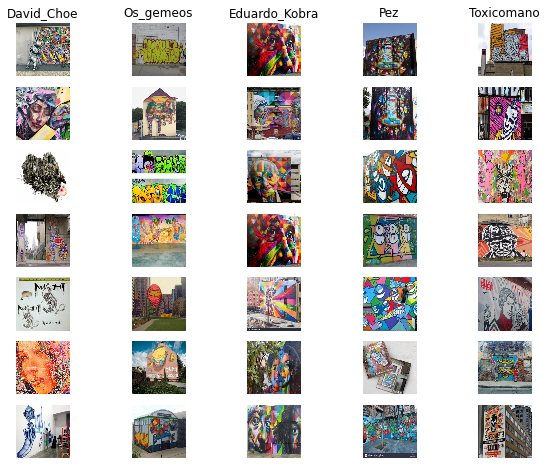

In [18]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['David_Choe','Os_gemeos','Eduardo_Kobra','Pez','Toxicomano']
# classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_tr == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_tr[idx])
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [53]:
# Reshape the image data into rows
X_tr = np.reshape(X_tr, (X_tr.shape[0], -1))
X_ts = np.reshape(X_ts, (X_ts.shape[0], -1))
X_va = np.reshape(X_va, (X_va.shape[0], -1))
print(X_tr.shape, X_ts.shape)

(541, 150528) (70, 150528)


In [0]:
import numpy as np
#from past.builtins import xrange
import sys
from collections import Counter

if sys.version_info >= (3, 0):
    def xrange(*args, **kwargs):
        return iter(range(*args, **kwargs))

class KNearestNeighbor(object):
  """ a kNN classifier with L2 distance """

  def __init__(self):
    pass

  def train(self, X, y):
    """
    Train the classifier. For k-nearest neighbors this is just 
    memorizing the training data.

    Inputs:
    - X: A numpy array of shape (num_train, D) containing the training data
      consisting of num_train samples each of dimension D.
    - y: A numpy array of shape (N,) containing the training labels, where
         y[i] is the label for X[i].
    """
    self.X_train = X
    self.y_train = y
    
  def predict(self, X, k=1, num_loops=0):
    """
    Predict labels for test data using this classifier.

    Inputs:
    - X: A numpy array of shape (num_test, D) containing test data consisting
         of num_test samples each of dimension D.
    - k: The number of nearest neighbors that vote for the predicted labels.
    - num_loops: Determines which implementation to use to compute distances
      between training points and testing points.

    Returns:
    - y: A numpy array of shape (num_test,) containing predicted labels for the
      test data, where y[i] is the predicted label for the test point X[i].  
    """
    if num_loops == 0:
      dists = self.compute_distances_no_loops(X)
    elif num_loops == 1:
      dists = self.compute_distances_one_loop(X)
    elif num_loops == 2:
      dists = self.compute_distances_two_loops(X)
    else:
      raise ValueError('Invalid value %d for num_loops' % num_loops)

    return self.predict_labels(dists, k=k)

  def compute_distances_two_loops(self, X):
    """
    Compute the distance between each test point in X and each training point
    in self.X_train using a nested loop over both the training data and the 
    test data.

    Inputs:
    - X: A numpy array of shape (num_test, D) containing test data.

    Returns:
    - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
      is the Euclidean distance between the ith test point and the jth training
      point.
    """
    num_test = X.shape[0]
    num_train = self.X_train.shape[0]
    dists = np.zeros((num_test, num_train))
    for i in xrange(num_test):
      for j in xrange(num_train):
        #####################################################################
        # TODO:                                                             #
        # Compute the l2 distance between the ith test point and the jth    #
        # training point, and store the result in dists[i, j]. You should   #
        # not use a loop over dimension.                                    #
        #####################################################################

        dists[i, j] = np.linalg.norm(self.X_train[j] - X[i])

        #####################################################################
        #                       END OF YOUR CODE                            #
        #####################################################################
    return dists

  def compute_distances_one_loop(self, X):
    """
    Compute the distance between each test point in X and each training point
    in self.X_train using a single loop over the test data.

    Input / Output: Same as compute_distances_two_loops
    """
    num_test = X.shape[0]
    num_train = self.X_train.shape[0]
    dists = np.zeros((num_test, num_train))
    for i in xrange(num_test):
      #######################################################################
      # TODO:                                                               #
      # Compute the l2 distance between the ith test point and all training #
      # points, and store the result in dists[i, :].                        #
      #######################################################################

      dists[i, :] = np.linalg.norm((self.X_train - X[i]), axis=-1)

      #######################################################################
      #                         END OF YOUR CODE                            #
      #######################################################################
    return dists

  def compute_distances_no_loops(self, X):
    """
    Compute the distance between each test point in X and each training point
    in self.X_train using no explicit loops.

    Input / Output: Same as compute_distances_two_loops
    """
    num_test = X.shape[0]
    num_train = self.X_train.shape[0]
    dists = np.zeros((num_test, num_train)) 
    #########################################################################
    # TODO:                                                                 #
    # Compute the l2 distance between all test points and all training      #
    # points without using any explicit loops, and store the result in      #
    # dists.                                                                #
    #                                                                       #
    # You should implement this function using only basic array operations; #
    # in particular you should not use functions from scipy.                #
    #                                                                       #
    # HINT: Try to formulate the l2 distance using matrix multiplication    #
    #       and two broadcast sums.                                         #
    #########################################################################

    dists = np.sqrt(np.sum(X**2, axis=1).reshape(num_test, 1) + np.sum(self.X_train**2, axis=1) - 2 * X.dot(self.X_train.T))

    #########################################################################
    #                         END OF YOUR CODE                              #
    #########################################################################
    return dists

  def predict_labels(self, dists, k=1):
    """
    Given a matrix of distances between test points and training points,
    predict a label for each test point.

    Inputs:
    - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
      gives the distance betwen the ith test point and the jth training point.

    Returns:
    - y: A numpy array of shape (num_test,) containing predicted labels for the
      test data, where y[i] is the predicted label for the test point X[i].  
    """
    num_test = dists.shape[0]
    y_pred = np.zeros(num_test)
    for i in xrange(num_test):
      # A list of length k storing the labels of the k nearest neighbors to
      # the ith test point.

      closest_y = []

      #########################################################################
      # TODO:                                                                 #
      # Use the distance matrix to find the k nearest neighbors of the ith    #
      # testing point, and use self.y_train to find the labels of these       #
      # neighbors. Store these labels in closest_y.                           #
      # Hint: Look up the function numpy.argsort.                             #
      #########################################################################

      top_k_indx = np.argsort(dists[i])[:k]
      closest_y = self.y_train[top_k_indx]

      #########################################################################
      # TODO:                                                                 #
      # Now that you have found the labels of the k nearest neighbors, you    #
      # need to find the most common label in the list closest_y of labels.   #
      # Store this label in y_pred[i]. Break ties by choosing the smaller     #
      # label.                                                                #
      #########################################################################

      vote = Counter(closest_y)
      count = vote.most_common()
      y_pred[i] = count[0][0]

      #########################################################################
      #                           END OF YOUR CODE                            #
      #########################################################################

    return y_pred


In [0]:
classifier = KNearestNeighbor()
classifier.train(X_tr, y_tr)

In [22]:
# Open cs231n/classifiers/k_nearest_neighbor.py and implement
# compute_distances_two_loops.

# Test your implementation:
dists = classifier.compute_distances_two_loops(X_ts)
print(dists.shape)

(70, 541)


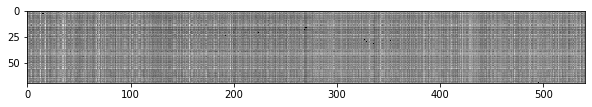

In [23]:
plt.imshow(dists, interpolation='none')
plt.show()

In [36]:
num_test = 70

y_test_pred = classifier.predict_labels(dists, k=1)
num_correct = np.sum(y_test_pred == y_ts)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 27 / 70 correct => accuracy: 0.385714


In [37]:
# Now lets speed up distance matrix computation by using partial vectorization
# with one loop. Implement the function compute_distances_one_loop and run the
# code below:
dists_one = classifier.compute_distances_one_loop(X_ts)

# To ensure that our vectorized implementation is correct, we make sure that it
# agrees with the naive implementation. There are many ways to decide whether
# two matrices are similar; one of the simplest is the Frobenius norm. In case
# you haven't seen it before, the Frobenius norm of two matrices is the square
# root of the squared sum of differences of all elements; in other words, reshape
# the matrices into vectors and compute the Euclidean distance between them.
difference = np.linalg.norm(dists - dists_one, ord='fro')
print('Difference was: %f' % (difference, ))
if difference < 0.001:
    print('Good! The distance matrices are the same')
else:
    print('Uh-oh! The distance matrices are different')

Difference was: 0.000000
Good! The distance matrices are the same


In [38]:
# Now implement the fully vectorized version inside compute_distances_no_loops
# and run the code
dists_two = classifier.compute_distances_no_loops(X_ts)

# check that the distance matrix agrees with the one we computed before:
difference = np.linalg.norm(dists - dists_two, ord='fro')
print('Difference was: %f' % (difference, ))
if difference < 0.001:
    print('Good! The distance matrices are the same')
else:
    print('Uh-oh! The distance matrices are different')

Difference was: 0.000027
Good! The distance matrices are the same


In [39]:
# Let's compare how fast the implementations are
def time_function(f, *args):
    """
    Call a function f with args and return the time (in seconds) that it took to execute.
    """
    import time
    tic = time.time()
    f(*args)
    toc = time.time()
    return toc - tic

two_loop_time = time_function(classifier.compute_distances_two_loops, X_ts)
print('Two loop version took %f seconds' % two_loop_time)

one_loop_time = time_function(classifier.compute_distances_one_loop, X_ts)
print('One loop version took %f seconds' % one_loop_time)

no_loop_time = time_function(classifier.compute_distances_no_loops, X_ts)
print('No loop version took %f seconds' % no_loop_time)

# you should see significantly faster performance with the fully vectorized implementation

Two loop version took 15.324501 seconds
One loop version took 25.533098 seconds
No loop version took 0.973220 seconds


In [0]:
X_e = X_tr[0:-1,]
y_e = y_tr[0:-1]

In [41]:
X_e.shape

(540, 150528)

In [42]:
y_e.shape

(540,)

In [43]:
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50]

X_train_folds = []
y_train_folds = []
################################################################################
# TODO:                                                                        #
# Split up the training data into folds. After splitting, X_train_folds and    #
# y_train_folds should each be lists of length num_folds, where                #
# y_train_folds[i] is the label vector for the points in X_train_folds[i].     #
# Hint: Look up the numpy array_split function.                                #
################################################################################

X_train_folds = np.split(X_e, num_folds)
y_train_folds = np.split(y_e, num_folds)

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

# A dictionary holding the accuracies for different values of k that we find
# when running cross-validation. After running cross-validation,
# k_to_accuracies[k] should be a list of length num_folds giving the different
# accuracy values that we found when using that value of k.

k_to_accuracies = {}
num_split = X_tr.shape[0] / num_folds
acc_k = np.zeros((len(k_choices), num_folds), dtype=np.float)

################################################################################
# TODO:                                                                        #
# Perform k-fold cross validation to find the best value of k. For each        #
# possible value of k, run the k-nearest-neighbor algorithm num_folds times,   #
# where in each case you use all but one of the folds as training data and the #
# last fold as a validation set. Store the accuracies for all fold and all     #
# values of k in the k_to_accuracies dictionary.                               #
################################################################################

for ik ,k in enumerate(k_choices):
    for i in range(num_folds):
        train_set = np.concatenate((X_train_folds[:i]+X_train_folds[i+1:]))
        label_set = np.concatenate((y_train_folds[:i]+y_train_folds[i+1:]))
        classifier.train(train_set, label_set)
        y_pred_fold = classifier.predict(X_train_folds[i], k=k, num_loops=0)
        num_correct = np.sum(y_pred_fold == y_train_folds[i])
        acc_k[ik, i] = float(num_correct) / num_split
    k_to_accuracies[k] = acc_k[ik]

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

# Print out the computed accuracies
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))



k = 1, accuracy = 0.157116
k = 1, accuracy = 0.536044
k = 1, accuracy = 0.304991
k = 1, accuracy = 0.036969
k = 1, accuracy = 0.009242
k = 3, accuracy = 0.101664
k = 3, accuracy = 0.591497
k = 3, accuracy = 0.314233
k = 3, accuracy = 0.018484
k = 3, accuracy = 0.009242
k = 5, accuracy = 0.092421
k = 5, accuracy = 0.600739
k = 5, accuracy = 0.304991
k = 5, accuracy = 0.000000
k = 5, accuracy = 0.009242
k = 8, accuracy = 0.055453
k = 8, accuracy = 0.637708
k = 8, accuracy = 0.341959
k = 8, accuracy = 0.000000
k = 8, accuracy = 0.000000
k = 10, accuracy = 0.046211
k = 10, accuracy = 0.609982
k = 10, accuracy = 0.332717
k = 10, accuracy = 0.000000
k = 10, accuracy = 0.000000
k = 12, accuracy = 0.036969
k = 12, accuracy = 0.619224
k = 12, accuracy = 0.314233
k = 12, accuracy = 0.000000
k = 12, accuracy = 0.000000
k = 15, accuracy = 0.009242
k = 15, accuracy = 0.573013
k = 15, accuracy = 0.323475
k = 15, accuracy = 0.000000
k = 15, accuracy = 0.000000
k = 20, accuracy = 0.000000
k = 20, accu

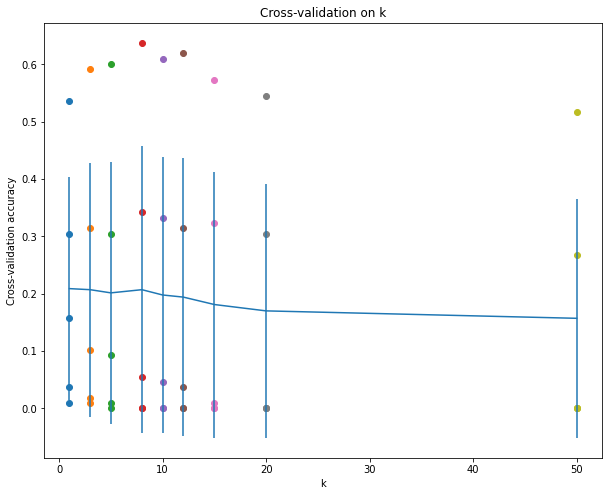

In [44]:
# plot the raw observations
for k in k_choices:
    accuracies = k_to_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)

# plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [45]:
# Based on the cross-validation results above, choose the best value for k,   
# retrain the classifier using all the training data, and test it on the test
# data. You should be able to get above 28% accuracy on the test data.
best_k = 8

classifier = KNearestNeighbor()
classifier.train(X_tr, y_tr)
y_test_pred = classifier.predict(X_ts, k=best_k)

# Compute and display the accuracy
num_correct = np.sum(y_test_pred == y_ts)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 15 / 70 correct => accuracy: 0.214286


In [54]:
# Based on the cross-validation results above, choose the best value for k,   
# retrain the classifier using all the training data, and test it on the test
# data. You should be able to get above 28% accuracy on the test data.
best_k = 8
num_val = 72
classifier = KNearestNeighbor()
classifier.train(X_tr, y_tr)
y_test_pred = classifier.predict(X_va, k=best_k)

# Compute and display the accuracy
num_correct = np.sum(y_test_pred == y_va)
accuracy = float(num_correct) / num_val
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_val, accuracy))

Got 18 / 72 correct => accuracy: 0.250000
